In [1]:
import ROOT
ROOT.gStyle.SetPalette(61)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetTextFont(42)
ROOT.gStyle.SetTextSize(0.05)
ROOT.gStyle.SetPadTickY(1)

import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

sys.path.append("/eos/home-y/yabulait/wjets/")
sys.path.append("/eos/home-y/yabulait/wjets/time-odd-asymmetry")

from context import (Luminosity_fb, Luminosity_pb, grid_date, event_weights, process_groups, data_groups)

from context import (load_mc16, load_data16, W_boson, W_boson_extend, asymmetry_region,
                    W_boson_extend_loose, W_boson_loose, asymmetry_region_loose)
#W_boson is W boson selection region.
#use W_boson["+"] for W+ 
#and W_boson["-"] for W-
#W_boson_extend is  W selection without mT cut.
#asymmetry_region is full asymmetry selections (Xperp included). 

#get data for different selection regions
#for tight leption:
#load_W_boson_extend(loose=False)
#load_W_boson(loose=False)
#load_asymmetry_region(loose=False)
from context import (load_W_boson_extend, load_W_boson, load_asymmetry_region)

import pyrootUtil
import json
from wjetsAsymmetryFrame import *
import pyrootUtil.plotUtil.styles as styles
from helper_functions import (get_rdf, fill_histogram, NormalizeHist, groupBy, draw_atlas_label, createColorTable,
                             plot_samples, plot_samples_stack, save_tree, bkg_compositions)


data_W_boson_extend = True
data_W_boson = False
data_asymmetry_region = False

loose_lep = False

Welcome to JupyROOT 6.20/06


In [2]:
#load tight 
datasetsRDF_mc16={}
datasetsRDF_data16= {}

if data_W_boson_extend:
    _datasets = load_W_boson_extend(loose=loose_lep)
    datasetsRDF_mc16=_datasets["mc16"]
    datasetsRDF_data16= _datasets["data16"]
elif data_W_boson:
    _datasets = load_W_boson(loose=loose_lep)
    datasetsRDF_mc16=_datasets["mc16"]
    datasetsRDF_data16= _datasets["data16"]
elif data_asymmetry_region:
    _datasets = load_asymmetry_region(loose=loose_lep)
    datasetsRDF_mc16=_datasets["mc16"]
    datasetsRDF_data16= _datasets["data16"]
else:
    print("What do you want?")

empty file:  364172


input_line_262:1:47: error: use of undeclared identifier 'qT'
namespace __rdf_45{ auto rdf_f = []() {return qT>30000
                                              ^


In [3]:
h_mT_mc16 = fill_histogram(datasetsRDF_mc16,("mt", "mT",30, 0,300), "mT_GeV", weightBR="weight_total")
h_Xprep_mc16 = fill_histogram(datasetsRDF_mc16,("Xperp","Xperp",100,-3.5,3.5), "Xperp", weightBR="weight_total")

h_mT_mc16_grouped_by_processes = groupBy(NormalizeHist(h_mT_mc16,event_weights,Luminosity_pb), process_groups)
h_Xprep_mc16_grouped_by_processes = groupBy(NormalizeHist(h_Xprep_mc16,event_weights,Luminosity_pb), process_groups)

In [4]:
h_mT_data16 = fill_histogram(datasetsRDF_data16,("mT", "mT",30, 0,300), "mT_GeV", weightBR=None)
h_Xprep_data16 = fill_histogram(datasetsRDF_data16,("Xperp","Xperp",100,-3.5,3.5), "Xperp", weightBR=None)

h_mT_data16_grouped_by_processes = groupBy(h_mT_data16, data_groups)
h_Xprep_data16_grouped_by_processes = groupBy(h_Xprep_data16, data_groups)

# MET distributions   

* one lepton pT > 30, |eta| < 2.5     
* leading jet pT > 30, |eta| < 4.4     

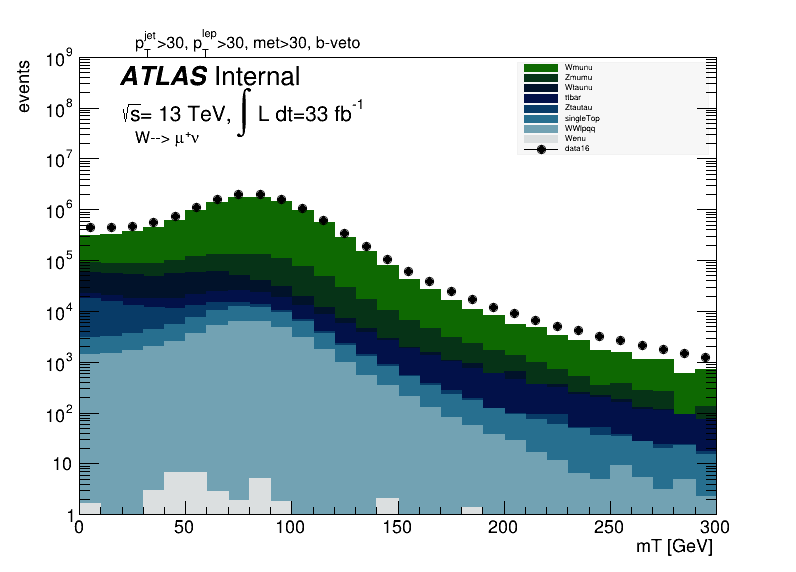

In [5]:


save_dir = "/eos/home-y/yabulait/wjets/plots/pdf/{0}/{1}/tight_selection/mu_plus/".format("dataVSmc",grid_date)
if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
            
fig = pyrootUtil.histplot("mT",size=[800, 600])
canv_qt = plot_samples_stack(fig,h_mT_mc16_grouped_by_processes, log='y', x_label="mT [GeV]", y_label="events")
canv_qt.cd()

h_mT_data16_grouped_by_processes["data16"].SetMarkerStyle(20)
h_mT_data16_grouped_by_processes["data16"].SetMarkerColor(1)
fig.plot(h_mT_data16_grouped_by_processes["data16"],
                ["data16"], option="same p0",
                color=[1])
draw_atlas_label(x=0.15, y=0.85)
styles.myText(0.17, 0.75, ROOT.kBlack, "W--> #mu^{+}#nu",tsize=0.03)
styles.myText(0.17, 0.915, ROOT.kBlack, "p_{T}^{jet}>30, p_{T}^{lep}>30, met>30, b-veto",tsize=0.03)
canv_qt.Print("%s/mT.pdf"%(save_dir))

In [6]:
h_mT_mc16_grouped_by_processes["Wmunu"]

<ROOT.TH1D object ("mt") at 0x3960e120>

In [7]:
h_total = h_mT_mc16_grouped_by_processes["Wmunu"].Clone("total")
h_ratio = h_mT_data16_grouped_by_processes["data16"].Clone()
h_ratio.Divide(h_total)

True

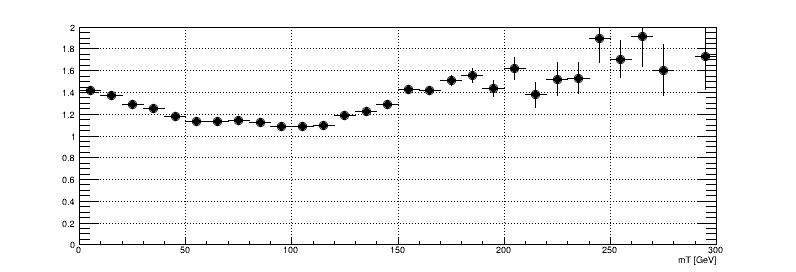

In [8]:
cRatio = ROOT.TCanvas("cRatio", "", 800,300)
cRatio.cd()
h_ratio.Draw("p0")
h_ratio.GetYaxis().SetRangeUser(0,2)
h_ratio.GetXaxis().SetTitle("mT [GeV]")
cRatio.SetGrid()
cRatio.Draw()
cRatio.Print("%s/mT_ratio.pdf"%(save_dir))

In [9]:
h_data = h_mT_data16_grouped_by_processes["data16"].Clone()


In [10]:
print("data:", h_data.Integral(6,30))
print("MC:", h_total.Integral(6,30))
print("data/MC: ", h_data.Integral(6,30)/h_total.Integral(6,30))

data: 10614811.0
MC: 9400693.632669024
data/MC:  1.129151891846758


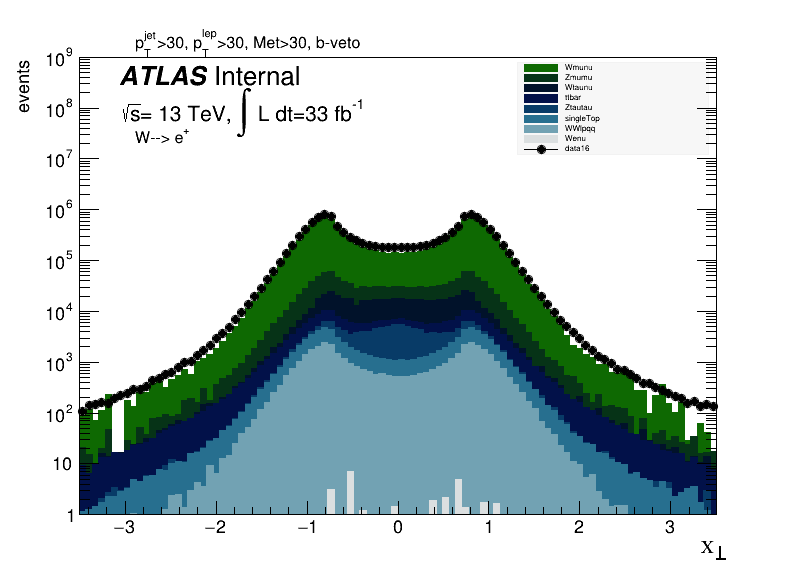

In [11]:
#styles.ATLAS_style(ROOT.gStyle)
fig = pyrootUtil.histplot("Xperp",size=[800, 600])
canv_xperp = plot_samples_stack(fig, h_Xprep_mc16_grouped_by_processes, log='y', x_label="#Chi_{#perp}", y_label="events",
                                Draw_option="HIST SAME PFC PLC PMC Y-")
canv_xperp.cd()

h_Xprep_data16_grouped_by_processes["data16"].SetMarkerStyle(20)
h_Xprep_data16_grouped_by_processes["data16"].SetMarkerColor(1)
fig.plot(h_Xprep_data16_grouped_by_processes["data16"],
                ["data16"], option="same p0",
                color=[1])

draw_atlas_label(x=0.15, y=0.85)
styles.myText(0.17, 0.75, ROOT.kBlack, "W--> e^{+}",tsize=0.03)
styles.myText(0.17, 0.915, ROOT.kBlack,
              "p_{T}^{jet}>30, p_{T}^{lep}>30, Met>30, b-veto",
              tsize=0.03)
canv_xperp.Print("%s/stack_xperp_NOmT.pdf"%(save_dir))

In [12]:
h_Xperp_data = h_Xprep_data16_grouped_by_processes["data16"].Clone()
h_total = h_Xprep_mc16_grouped_by_processes["Wmunu"].Clone("total")
h_ratio = h_Xprep_data16_grouped_by_processes["data16"].Clone()
h_ratio.Divide(h_total)

True

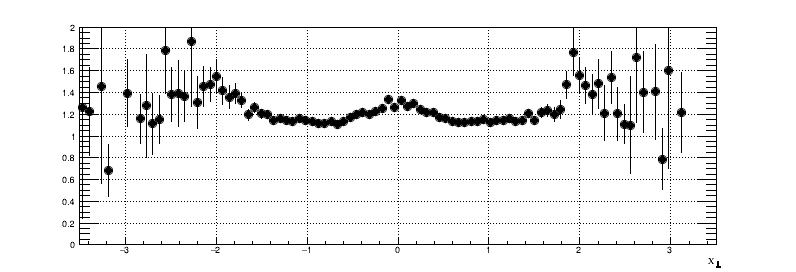

In [13]:
cRatio_Xperp = ROOT.TCanvas("cRatio_Xperp", "", 800,300)
cRatio_Xperp.cd()
h_ratio.GetYaxis().SetRangeUser(0,2)
h_ratio.GetXaxis().SetTitle("#Chi_{#perp}")
h_ratio.Draw("p0")
cRatio_Xperp.Draw()
cRatio_Xperp.SetGrid()
cRatio_Xperp.Print("%s/Xperp_ratio.pdf"%(save_dir))